In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./economic_freedom_index2019_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
CountryID                      186 non-null int64
Country Name                   186 non-null object
WEBNAME                        186 non-null object
Region                         186 non-null object
World Rank                     180 non-null float64
Region Rank                    180 non-null float64
2019 Score                     180 non-null float64
Property Rights                185 non-null float64
Judical Effectiveness          185 non-null float64
Government Integrity           185 non-null float64
Tax Burden                     180 non-null float64
Gov't Spending                 183 non-null float64
Fiscal Health                  183 non-null float64
Business Freedom               185 non-null float64
Labor Freedom                  184 non-null float64
Monetary Freedom               184 non-null float64
Trade Freedom                  182 non-null float64
Investment Freed

In [2]:
df.head(4)

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3


### It would seem that the 'WEBNAME' and 'Country' columns are reduntant.

In [3]:
print(df['Country Name'].equals(df['WEBNAME']))

False


In [4]:
print(df['Country Name'].equals(df['Country']))

False


### Although there might be some slight differences, let's delete them to make our code simpler

In [5]:
df.drop('WEBNAME', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)

In [6]:
df.head(4)

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,...,25.6,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,...,29.5,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,...,41.4,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,...,25.3,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3


### Null values are a hassle. Although it must be noted that many statistical methods ignore them and sometimes they are useful.

#### We will not need them so let's get rid of them


In [7]:
df.isna().sum()

CountryID                      0
Country Name                   0
Region                         0
World Rank                     6
Region Rank                    6
2019 Score                     6
Property Rights                1
Judical Effectiveness          1
Government Integrity           1
Tax Burden                     6
Gov't Spending                 3
Fiscal Health                  3
Business Freedom               1
Labor Freedom                  2
Monetary Freedom               2
Trade Freedom                  4
Investment Freedom             2
Financial Freedom              5
Tariff Rate (%)                4
Income Tax Rate (%)            3
Corporate Tax Rate (%)         3
Tax Burden % of GDP            7
Gov't Expenditure % of GDP     4
Population (Millions)          0
GDP (Billions, PPP)            1
GDP Growth Rate (%)            2
5 Year GDP Growth Rate (%)     3
GDP per Capita (PPP)           2
Unemployment (%)               5
Inflation (%)                  4
FDI Inflow

### We could be losing out on a lot here. Maybe, some rows have only 1 value missing which means that we can use all other entries

In [10]:
new_df = df[pd.isnull(df).any(axis=1)]
new_df.head()


,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
42,42,Cuba,Americas,178.0,31.0,27.8,31.6,10.0,37.7,48.8,...,64.2,11.5,$148.0,0.9,1.9,"$12,920",2.6,5.5,NaN,47.7
47,47,Dominica,Americas,72.0,14.0,63.6,49.2,63.8,54.5,72.1,...,39.4,0.1,$0.8,-4.2,0.0,"$11,102",NaN,0.6,18.9,87.6
78,77,Iraq,Middle East and North Africa,NaN,NaN,NaN,37.0,12.3,20.3,NaN,...,39.7,38.9,$658.8,-0.8,4.7,"$16,954",8.2,0.1,"-5,032.4",58.0
87,86,Kiribati,Asia-Pacific,168.0,41.0,47.3,44.1,34.3,35.1,73.0,...,117.9,0.1,$0.2,3.1,3.6,"$1,976",NaN,2.2,1.4,26.3
88,87,"Korea, North",Asia-Pacific,180.0,43.0,5.9,31.6,5.0,24.4,0.0,...,100.0,25.4,$40.0 (2015 est.),1.1,NaN,"$1,700 (2015 est.)",4.8,NaN,63.4,NaN


In [13]:
new_df

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
42,42,Cuba,Americas,178.0,31.0,27.8,31.6,10.0,37.7,48.8,...,64.2,11.5,$148.0,0.9,1.9,"$12,920",2.6,5.5,NaN,47.7
47,47,Dominica,Americas,72.0,14.0,63.6,49.2,63.8,54.5,72.1,...,39.4,0.1,$0.8,-4.2,0.0,"$11,102",NaN,0.6,18.9,87.6
78,77,Iraq,Middle East and North Africa,NaN,NaN,NaN,37.0,12.3,20.3,NaN,...,39.7,38.9,$658.8,-0.8,4.7,"$16,954",8.2,0.1,"-5,032.4",58.0
87,86,Kiribati,Asia-Pacific,168.0,41.0,47.3,44.1,34.3,35.1,73.0,...,117.9,0.1,$0.2,3.1,3.6,"$1,976",NaN,2.2,1.4,26.3
88,87,"Korea, North",Asia-Pacific,180.0,43.0,5.9,31.6,5.0,24.4,0.0,...,100.0,25.4,$40.0 (2015 est.),1.1,NaN,"$1,700 (2015 est.)",4.8,NaN,63.4,NaN
90,185,Kosovo,Europe,51.0,26.0,67.0,57.2,53.5,44.7,92.5,...,27.2,1.9,$19.6,4.1,3.4,"$10,515",NaN,1.5,3.6,20.9
98,96,Libya,Middle East and North Africa,NaN,NaN,NaN,7.6,24.4,15.8,NaN,...,139.2,6.4,$64.4,70.8,-7.9,"$9,986",17.7,28.0,NaN,4.7
99,97,Liechtenstein,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"38,000 ppl.",$6.1 CHF (2014 ),NaN,NaN,"$139,100 (2009 est.)",2.1 (2016),NaN,NaN,NaN
113,111,Micronesia,Asia-Pacific,149.0,38.0,51.9,7.6,26.6,36.6,92.8,...,59.2,0.1,$0.3,2.0,0.7,"$3,393",NaN,0.5,NaN,24.5
147,145,Seychelles,Sub-Saharan Africa,87.0,6.0,61.4,58.2,37.5,39.2,76.3,...,36.4,0.1,$2.7,4.2,4.9,"$28,779",NaN,2.9,191.9,63.3


### It seems like we only have 13 countries. So, what we'll do is predict some correlations in the original dataset and attempt to prove them using these countries. Or, we can give counter-examples.


### So, let us delete these rows from the original dataset

In [14]:
df = df.dropna(how='any',axis=0) 
df.isna().sum()

CountryID                      0
Country Name                   0
Region                         0
World Rank                     0
Region Rank                    0
2019 Score                     0
Property Rights                0
Judical Effectiveness          0
Government Integrity           0
Tax Burden                     0
Gov't Spending                 0
Fiscal Health                  0
Business Freedom               0
Labor Freedom                  0
Monetary Freedom               0
Trade Freedom                  0
Investment Freedom             0
Financial Freedom              0
Tariff Rate (%)                0
Income Tax Rate (%)            0
Corporate Tax Rate (%)         0
Tax Burden % of GDP            0
Gov't Expenditure % of GDP     0
Population (Millions)          0
GDP (Billions, PPP)            0
GDP Growth Rate (%)            0
5 Year GDP Growth Rate (%)     0
GDP per Capita (PPP)           0
Unemployment (%)               0
Inflation (%)                  0
FDI Inflow

In [15]:
df.head(3)


,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,...,25.6,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,...,29.5,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,...,41.4,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8


In [16]:
type(df["GDP (Billions, PPP)"])

pandas.core.series.Series

### The GDP figures are messy. Let's clean them up!

In [21]:
df['GDP (Billions, PPP)'] = df['GDP (Billions, PPP)'].str.replace('$','')
df['GDP per Capita (PPP)'] = df['GDP per Capita (PPP)'].str.replace('$','')
df['GDP (Billions, PPP)'] = df['GDP (Billions, PPP)'].str.replace(',','')
df['GDP per Capita (PPP)'] = df['GDP per Capita (PPP)'].str.replace(',','')
df['FDI Inflow (Millions)'] = df['FDI Inflow (Millions)'].str.replace(',','')

df.head(2)

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,...,25.6,35.5,69.6,2.5,2.9,1958,8.8,5.0,53.9,7.3
1,2,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,...,29.5,2.9,36.0,3.9,2.5,12507,13.9,2.0,1119.1,71.2


In [22]:
#The extraneous info.such as '1700 (2015 est.)' will also be removed
df['GDP per Capita (PPP)'] = df['GDP per Capita (PPP)'].str.split(' ').str[0]
df['GDP per Capita (PPP)'] = df['GDP per Capita (PPP)'].astype(float)
df['GDP per Capita (PPP)']

0       1958.0
1      12507.0
2      15237.0
3       6753.0
4      20876.0
5       9456.0
6      50334.0
7      49869.0
8      17492.0
9      31139.0
10     48505.0
11      4211.0
12     18664.0
13     18931.0
14     46553.0
15      8324.0
16      2277.0
17      8744.0
18      7547.0
19     12724.0
20     17828.0
21     15603.0
22     78196.0
23     21687.0
24      1889.0
25      6244.0
26       735.0
27      4012.0
28      3660.0
29     48265.0
        ...   
154    13545.0
155    38286.0
156    12811.0
157     4586.0
158    14606.0
159    51475.0
160    61422.0
162    50294.0
163     3212.0
164     3240.0
165    17856.0
166     5444.0
167     1659.0
168     5608.0
169    31367.0
170    11755.0
171    26893.0
172    18126.0
173     2354.0
174     8713.0
175    67741.0
176    44118.0
177    59501.0
178    22371.0
179     6929.0
180     2739.0
181    12114.0
182     6913.0
184     3996.0
185     2283.0
Name: GDP per Capita (PPP), Length: 173, dtype: float64

### How does a country compare with the global averages?

In [35]:
def compare_with_others(test):
    print(test + ' '*50 + 'World')
    test_df = df.loc[df['Country Name']==test]
    for i in test_df:
        try:
            world_average = df[i].mean()
        except:
            world_average = 'Not Applicable'
        print(i + ' '*10 + str(test_df.iloc[0][i]) + ' '*30 + str(world_average))
        


In [36]:
compare_with_others('Algeria')

Algeria                                                  World
CountryID          3                              91.8728323699422
Country Name          Algeria                              Not Applicable
Region          Middle East and North Africa                              Not Applicable
World Rank          171.0                              89.04624277456648
Region Rank          14.0                              20.21965317919075
2019 Score          46.2                              61.34913294797688
Property Rights          31.6                              53.56184971098266
Judical Effectiveness          36.2                              46.045086705202316
Government Integrity          28.9                              42.28439306358381
Tax Burden          76.4                              77.70404624277457
Gov't Spending          48.7                              66.01907514450868
Fiscal Health          18.7                              66.81156069364162
Business Freedom       

In [38]:
# Let's check out a European Country

european_countries = df[df['Region']=='Europe']
print(european_countries['Country Name'])

1                     Albania
5                     Armenia
7                     Austria
13                    Belarus
14                    Belgium
19     Bosnia and Herzegovina
23                   Bulgaria
41                    Croatia
43                     Cyprus
44             Czech Republic
45                    Denmark
54                    Estonia
58                    Finland
59                     France
62                    Georgia
63                    Germany
65                     Greece
73                    Hungary
74                    Iceland
79                    Ireland
81                      Italy
94                     Latvia
100                 Lithuania
101                Luxembourg
103                 Macedonia
109                     Malta
114                   Moldova
116                Montenegro
121               Netherlands
126                    Norway
134                    Poland
135                  Portugal
137                   Romania
138       

In [39]:
compare_with_others('Switzerland')

Switzerland                                                  World
CountryID          158                              91.8728323699422
Country Name          Switzerland                              Not Applicable
Region          Europe                              Not Applicable
World Rank          4.0                              89.04624277456648
Region Rank          1.0                              20.21965317919075
2019 Score          81.9                              61.34913294797688
Property Rights          85.3                              53.56184971098266
Judical Effectiveness          82.0                              46.045086705202316
Government Integrity          88.0                              42.28439306358381
Tax Burden          70.5                              77.70404624277457
Gov't Spending          64.8                              66.01907514450868
Fiscal Health          96.3                              66.81156069364162
Business Freedom          75.4        

In [40]:
df.isna().sum()

CountryID                      0
Country Name                   0
Region                         0
World Rank                     0
Region Rank                    0
2019 Score                     0
Property Rights                0
Judical Effectiveness          0
Government Integrity           0
Tax Burden                     0
Gov't Spending                 0
Fiscal Health                  0
Business Freedom               0
Labor Freedom                  0
Monetary Freedom               0
Trade Freedom                  0
Investment Freedom             0
Financial Freedom              0
Tariff Rate (%)                0
Income Tax Rate (%)            0
Corporate Tax Rate (%)         0
Tax Burden % of GDP            0
Gov't Expenditure % of GDP     0
Population (Millions)          0
GDP (Billions, PPP)            0
GDP Growth Rate (%)            0
5 Year GDP Growth Rate (%)     0
GDP per Capita (PPP)           0
Unemployment (%)               0
Inflation (%)                  0
FDI Inflow

In [42]:
df[["Population (Millions)", "GDP (Billions, PPP)","Unemployment (%)","FDI Inflow (Millions)"]] = df[["Population (Millions)", "GDP (Billions, PPP)","Unemployment (%)","FDI Inflow (Millions)"]].apply(pd.to_numeric)

In [43]:
df.dtypes


CountryID                        int64
Country Name                    object
Region                          object
World Rank                     float64
Region Rank                    float64
2019 Score                     float64
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Population (Millions)          float64
GDP (Billions, PPP)            float64
GDP Growth Rate (%)      

### Winners and Losers

In [47]:
countryA = df[df['World Rank'] == np.max(df['World Rank'])]

In [50]:
print(countryA['Country Name'])

181    Venezuela
Name: Country Name, dtype: object


In [51]:
countryB = df[df['World Rank'] == np.min(df['World Rank'])]
print(countryB['Country Name'])

72    Hong Kong
Name: Country Name, dtype: object


In [52]:
countryC = df[df['World Rank'] == int(np.mean(df['World Rank']))]
print(countryC['Country Name'])

48    Dominican Republic
Name: Country Name, dtype: object


### Claims 

* GDP per capita depends directly on strength of institutions

In [53]:
# Induction Step
print(countryA['GDP per Capita (PPP)'],countryA['Property Rights'],countryA['Judical Effectiveness'],countryA['Government Integrity'])

(181    12114.0
Name: GDP per Capita (PPP), dtype: float64, 181    7.6
Name: Property Rights, dtype: float64, 181    13.1
Name: Judical Effectiveness, dtype: float64, 181    7.9
Name: Government Integrity, dtype: float64)


In [54]:
print(countryB['GDP per Capita (PPP)'],countryB['Property Rights'],countryB['Judical Effectiveness'],countryB['Government Integrity'])

(72    61393.0
Name: GDP per Capita (PPP), dtype: float64, 72    93.3
Name: Property Rights, dtype: float64, 72    75.3
Name: Judical Effectiveness, dtype: float64, 72    83.8
Name: Government Integrity, dtype: float64)


In [57]:
# using the corr() function and rounding to 3 places
measures = ['Property Rights','Judical Effectiveness','Government Integrity']
for col in measures:
    print(col,round(df[col].corr(df["GDP per Capita (PPP)"]),3))

('Property Rights', 0.693)
('Judical Effectiveness', 0.65)
('Government Integrity', 0.708)


#### We see a clear positive correlation. Hence our claim is proved.

* If there is more economic freedom, there is higher GDP per Capita

In [59]:
freedom=[
'Business Freedom',              
'Labor Freedom',                 
'Monetary Freedom',               
'Trade Freedom',                  
'Financial Freedom'
]
for col in freedom:
    print(col,round(df[col].corr(df["GDP per Capita (PPP)"]),3))

('Business Freedom', 0.549)
('Labor Freedom', 0.264)
('Monetary Freedom', 0.317)
('Trade Freedom', 0.562)
('Financial Freedom', 0.592)


#### We see a positive correlation, however 'Labor Freedom' seems to have a low correlation

In [61]:
print('Let us now look for all attributes')

Let us now look for all attributes


In [67]:
all_measures = ["Property Rights","Judical Effectiveness","Government Integrity","Tax Burden",
  "Gov't Spending","Fiscal Health","Business Freedom","Labor Freedom","Monetary Freedom",
  "Trade Freedom","Investment Freedom ","Financial Freedom"]
for col in all_measures:
    print(col+" "*(30-len(col))+str(round(df[col].corr(df["GDP per Capita (PPP)"]),3)))

Property Rights               0.693
Judical Effectiveness         0.65
Government Integrity          0.708
Tax Burden                    -0.093
Gov't Spending                -0.349
Fiscal Health                 0.242
Business Freedom              0.549
Labor Freedom                 0.264
Monetary Freedom              0.317
Trade Freedom                 0.562
Investment Freedom            0.477
Financial Freedom             0.592


### "Mankind invented a system to cope with the fact that we are so intrinsically lousy at manipulating numbers. It's called the graph." ~ Charlie Munger

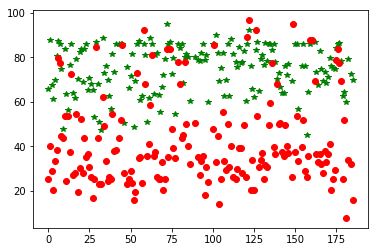

In [71]:
# Let us plot GDP per capita v/s Government Integrity

plt.plot(df['Trade Freedom'],'g*', df['Government Integrity'], 'ro')
plt.show()

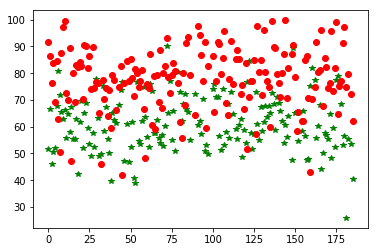

In [72]:
# Let us plot GDP per capita v/s Government Integrity

plt.plot(df['2019 Score'],'g*', df['Tax Burden'], 'ro')
plt.show()

In [73]:
print("We observe the difference between +ve and -ve associations")

We observe the difference between +ve and -ve associations


### Let us now try an _experiment_
### Let's try fitting a model on some parameters and try to predict the score of the country

In [76]:
print(countryC['2019 Score'])

48    61.0
Name: 2019 Score, dtype: float64


In [77]:
avg = (df['2019 Score'].mean())

61.34913294797688


In [88]:
avg = (df['2019 Score'].mean())
def getScore(score):
    if score<=avg:
        return 0
    else:
        return 1
    


In [89]:
l=[]
for i in df['2019 Score']:
    l.append(getScore(i))


In [90]:
final_scores = np.array(l)
final_scores

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

### Let us select _three_ parameters to try and predict whether a country is above or below average

#### Let us look at the correlations we will find to choose the parameters

In [91]:
all_measures = ["Property Rights","Judical Effectiveness","Government Integrity","Tax Burden",
  "Gov't Spending","Fiscal Health","Business Freedom","Labor Freedom","Monetary Freedom",
  "Trade Freedom","Investment Freedom ","Financial Freedom"]
for col in all_measures:
    print(col+" "*(30-len(col))+str(round(df[col].corr(df["2019 Score"]),3)))

Property Rights               0.877
Judical Effectiveness         0.806
Government Integrity          0.818
Tax Burden                    -0.075
Gov't Spending                -0.141
Fiscal Health                 0.559
Business Freedom              0.78
Labor Freedom                 0.513
Monetary Freedom              0.589
Trade Freedom                 0.718
Investment Freedom            0.735
Financial Freedom             0.794


In [92]:
print("We will choose PROPERTY RIGHTS, JUDICIAL EFFECTIVENESS AND GOVERNMENT INTEGRITY")

We will choose PROPERTY RIGHTS, JUDICIAL EFFECTIVENESS AND GOVERNMENT INTEGRITY


In [96]:
to_be_tested = df[['Property Rights','Judical Effectiveness','Government Integrity']]

In [97]:
to_be_tested.head(3)

,Property Rights,Judical Effectiveness,Government Integrity
0,19.6,29.6,25.2
1,54.8,30.6,40.4
2,31.6,36.2,28.9


In [99]:
to_be_tested.shape

(173, 3)

In [100]:
len(final_scores)

173

In [101]:
to_be_tested.isna().sum()

Property Rights          0
Judical Effectiveness    0
Government Integrity     0
dtype: int64

In [102]:
print('Cool! Let\'s get started!')

Cool! Let's get started!


### We will be using k nearest neighbours classifier, with k = 4 

In [104]:
X = to_be_tested.iloc[:, :].values

In [108]:
X # Training Data

array([[19.6, 29.6, 25.2],
       [54.8, 30.6, 40.4],
       [31.6, 36.2, 28.9],
       [35.9, 26.6, 20.5],
       [47.8, 44.5, 33.5],
       [57.2, 46.3, 38.6],
       [79.1, 86.5, 79.9],
       [84.2, 71.3, 77.4],
       [59.1, 53.1, 44.7],
       [42.2, 46.9, 43.7],
       [63.5, 50.7, 53.6],
       [36.1, 34.5, 24.4],
       [52.9, 59.9, 53.8],
       [55.2, 51.7, 37.7],
       [81.3, 61.6, 72.5],
       [41.7, 46.9, 27.2],
       [37.2, 32.8, 28.1],
       [62.5, 55.4, 54.5],
       [20.5, 12.3, 19.7],
       [40.2, 37.9, 30.2],
       [58.1, 45.7, 52.4],
       [57.3, 51.7, 28.1],
       [64. , 56. , 43.7],
       [62.5, 41.9, 35.1],
       [49.1, 42.9, 36.6],
       [34.7, 18.1, 30.6],
       [20.6, 31. , 26.2],
       [37.4, 27.6, 16.7],
       [42.5, 31.3, 25.5],
       [87. , 69.4, 84.6],
       [44.1, 49. , 43.7],
       [19.6, 29.6, 23.2],
       [26.7, 24.6, 23.2],
       [68.7, 56.3, 62.3],
       [49.9, 75.2, 49.1],
       [59.2, 34.3, 33.5],
       [36.5, 29.6, 24.4],
 

In [106]:
y = final_scores

In [109]:
y # Testing Data

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [110]:
print('Spitting into Training and Testing Data')

Spitting into Training and Testing Data


In [111]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [112]:
X_train

array([[65.9, 54.6, 58.5],
       [84.1, 68.2, 55.4],
       [65.9, 36.4, 51.9],
       [41.7, 46.9, 27.2],
       [35.4, 41.4, 33.2],
       [33.9, 35.2, 28.1],
       [81.3, 61.6, 72.5],
       [97.4, 92.4, 95.1],
       [10.4, 25.3, 20.3],
       [82.5, 66.1, 67.9],
       [37.4, 26.6, 35.5],
       [81.5, 76. , 73.1],
       [55.2, 51.7, 37.7],
       [33.7, 33.4, 29.6],
       [32.6, 40.9, 35.1],
       [56.1, 34. , 31.8],
       [27.5, 30.6, 30.6],
       [52.9, 59.9, 53.8],
       [48.7, 36.4, 30.9],
       [41.7, 42.9, 35. ],
       [64.5, 60. , 77.4],
       [42.2, 38.5, 25.4],
       [29.7, 13.1, 32.1],
       [40.2, 37.9, 30.2],
       [58.8, 39.3, 39.7],
       [58.1, 51.6, 53.8],
       [36.1, 34.5, 24.4],
       [73.6, 61.2, 47.8],
       [67.3, 42.9, 23.4],
       [95. , 83.5, 96.7],
       [49.1, 44.2, 35.5],
       [59.3, 56.1, 40.3],
       [85.3, 82. , 88. ],
       [41.7, 42.9, 33.2],
       [27.5, 22.2, 26.2],
       [58.4, 52.6, 50.3],
       [33.2, 29.6, 25.3],
 

In [113]:
X_test

array([[59.1, 53.1, 44.7],
       [52.3, 40.6, 32.9],
       [34.7, 18.1, 30.6],
       [47.8, 40.4, 40.3],
       [72.9, 51.4, 51.9],
       [55. , 62.7, 49.8],
       [59.2, 34.3, 33.5],
       [66.7, 51.9, 39.8],
       [29.7, 18.1, 15.8],
       [52.4, 45.1, 36.6],
       [60.4, 30.1, 34.1],
       [39.5, 30. , 25.5],
       [86.1, 81.2, 92.3],
       [29.7, 24.8, 15.8],
       [84.2, 71.3, 77.4],
       [49.2, 42.7, 36.6],
       [52.4, 49.5, 37.7],
       [36.5, 29.6, 24.4],
       [89.5, 84. , 88. ],
       [44.7, 39.4, 28.9],
       [55.2, 29.6, 25.4],
       [35.9, 20.2, 25.3],
       [59.1, 34.9, 26.3],
       [65.9, 63.8, 50.3],
       [41.5, 45.7, 30.9],
       [88. , 74.7, 89.1],
       [49.9, 27.9, 27.2],
       [62.5, 55.4, 54.5],
       [39.5, 26.6, 18.2],
       [57.3, 61.6, 47.8],
       [65.1, 60.7, 44.7],
       [57.2, 46.3, 38.6],
       [35.5, 18.1, 19.7],
       [29.7, 18.1, 28.1],
       [42.2, 46.9, 43.7]])

In [114]:
y_train

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1])

In [115]:
y_test

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [124]:
# Imports

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


### Feature Scaling:

In [125]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
# Building a classifier and fitting it to the training data

classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [127]:
# Predicting the results

y_pred = classifier.predict(X_test)

In [128]:
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [129]:
# Reporting Accuracy

def print_report(pred,test):
    count = 0
    for i in range(len(pred)):
        if pred[i] == test[i]:
            count+=1 
    accuracy = float(count/len(pred))
    print('Correct: '+str(count))
    print('Number of Values: '+str(len(pred)))
    print('Acuuracy: '+str(accuracy))


In [130]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  2]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.88      0.82      0.85        17

   micro avg       0.86      0.86      0.86        35
   macro avg       0.86      0.86      0.86        35
weighted avg       0.86      0.86      0.86        35



#### We have an accuracy of about 87%

### Let's try for k = 1 to 30 and see which k gives highest accuracy

In [131]:
error = []   # Stores error values corresponding to each 'k'
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predi = knn.predict(X_test)
    error.append(np.mean(predi != y_test))

In [132]:
error

[0.17142857142857143,
 0.11428571428571428,
 0.11428571428571428,
 0.14285714285714285,
 0.17142857142857143,
 0.14285714285714285,
 0.14285714285714285,
 0.17142857142857143,
 0.17142857142857143,
 0.14285714285714285,
 0.14285714285714285,
 0.17142857142857143,
 0.14285714285714285,
 0.2,
 0.17142857142857143,
 0.2,
 0.2,
 0.22857142857142856,
 0.2,
 0.2571428571428571,
 0.2,
 0.2571428571428571,
 0.22857142857142856,
 0.2571428571428571,
 0.22857142857142856,
 0.22857142857142856,
 0.22857142857142856,
 0.22857142857142856,
 0.22857142857142856]

### "The purpose of visualization is insight, not pictures.  ―Ben Shneiderman"

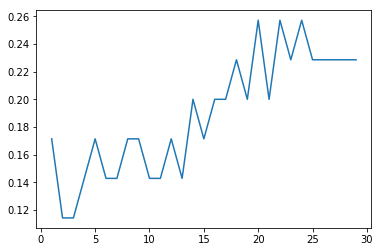

In [134]:
plt.plot(range(1,30),error)

In [135]:
print("So what can we infer from this?")

So what can we infer from this?


### The error is minimum at k = 2 and k = 3, as evident in the data

In [137]:
array_of_errors = np.array(error)

In [138]:
array_of_errors

array([0.17142857, 0.11428571, 0.11428571, 0.14285714, 0.17142857,
       0.14285714, 0.14285714, 0.17142857, 0.17142857, 0.14285714,
       0.14285714, 0.17142857, 0.14285714, 0.2       , 0.17142857,
       0.2       , 0.2       , 0.22857143, 0.2       , 0.25714286,
       0.2       , 0.25714286, 0.22857143, 0.25714286, 0.22857143,
       0.22857143, 0.22857143, 0.22857143, 0.22857143])

In [143]:
print("1st k with highest accuracy ="),
print(np.argmin(array_of_errors)) + 1

1st k with highest accuracy = 2


### Winners and Losers

In [144]:
print("Smallest k with highest accuracy ="),
print(np.argmin(array_of_errors)) + 1
print("Smallest k with lowest accuracy ="),
print(np.argmax(array_of_errors)) + 1

Smallest k with highest accuracy = 2
Smallest k with lowest accuracy = 20


## This concludes the analysis of economies and its contributing factors
## Check out my GitHub for more : 